In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
ticker_value = 'DIS'

In [3]:
ticker = yf.Ticker(ticker_value)
df = ticker.history(period="2y")

In [4]:
# print(closing_prices.tail())
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Find buy/sell signals
df['Signal'] = 0
df.loc[df['MA50'] > df['MA200'], 'Signal'] = 1
df['CrossOver'] = df['Signal'].diff()

# Create signals dataframe
buy_signals = df[df['CrossOver'] == 1].copy()
sell_signals = df[df['CrossOver'] == -1].copy()

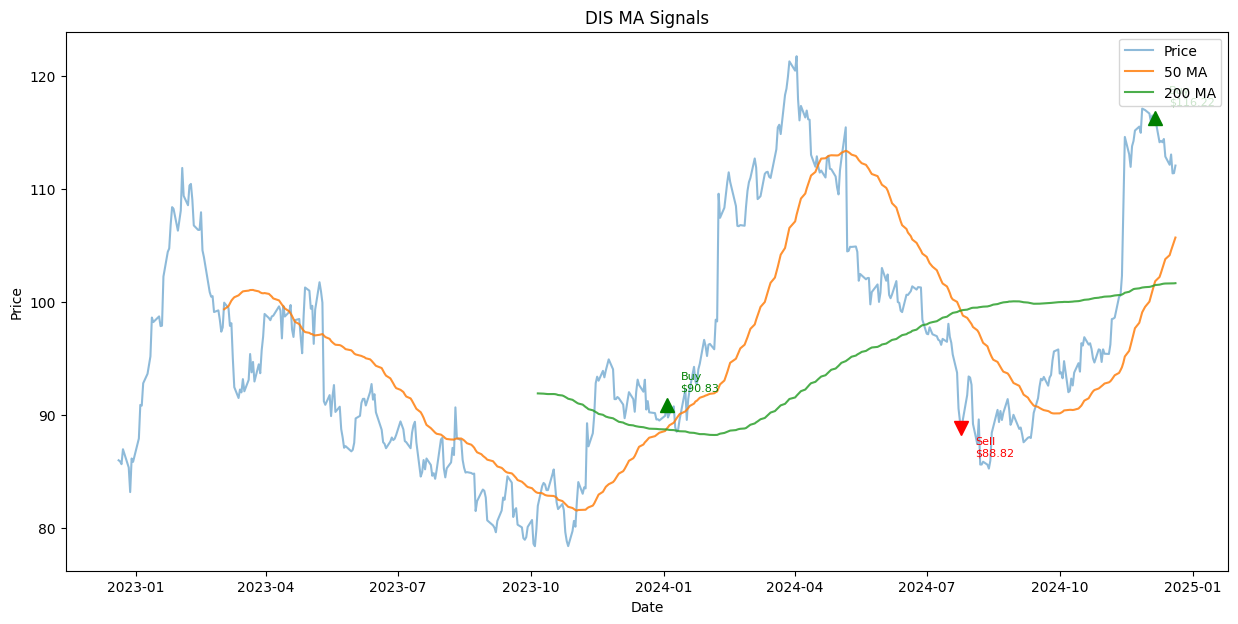

In [5]:
# Plot
plt.figure(figsize=(15,7))
plt.plot(df.index, df['Close'], label='Price', alpha=0.5)
plt.plot(df.index, df['MA50'], label='50 MA', alpha=0.85)
plt.plot(df.index, df['MA200'], label='200 MA', alpha=0.85)

# Plot buy signals with prices
for idx in buy_signals.index:
    price = buy_signals.loc[idx, 'Close']
    plt.annotate(f'Buy\n${price:.2f}', 
                (idx, price),
                xytext=(10, 10), 
                textcoords='offset points',
                color='green',
                fontsize=8)
    plt.plot(idx, price, '^', color='g', markersize=10)

# Plot sell signals with prices
for idx in sell_signals.index:
    price = sell_signals.loc[idx, 'Close']
    plt.annotate(f'Sell\n${price:.2f}', 
                (idx, price),
                xytext=(10, -20), 
                textcoords='offset points',
                color='red',
                fontsize=8)
    plt.plot(idx, price, 'v', color='r', markersize=10)

plt.title(ticker_value + ' MA Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()